<a href="https://colab.research.google.com/github/slaninam/MCDA/blob/master/exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import urllib.request
import zipfile

from pathlib import Path

datafile = Path('data.zip')

if not datafile.exists():
  print('Retrieving data file')
  url = 'https://m-cloud.netztest.at/RMBTStatisticServer/export/netztest-opendata-2019-09.zip'
  urllib.request.urlretrieve(url, 'data.zip')

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')
    
df = pd.read_csv('netztest-opendata-2019-09.csv')

lte = df[df['network_type'] == 'LTE'] 
lte = lte[lte['country_location'] == 'AT']
print(len(lte))

21902


In [38]:
sorted(list(lte))

['asn',
 'cat_technology',
 'cell_area_code',
 'cell_location_id',
 'channel_number',
 'client_version',
 'country_location',
 'download_kbit',
 'dtm_level',
 'edge_id',
 'gkz',
 'gkz_sa',
 'implausible',
 'ip_anonym',
 'kg_nr',
 'land_cover',
 'lat',
 'link_distance',
 'link_frc',
 'link_id',
 'link_name',
 'loc_accuracy',
 'loc_src',
 'long',
 'lte_rsrp',
 'lte_rsrq',
 'model',
 'nat_type',
 'ndt_download_kbit',
 'ndt_upload_kbit',
 'network_mcc_mnc',
 'network_name',
 'network_type',
 'num_threads',
 'open_test_uuid',
 'open_uuid',
 'ping_ms',
 'pinned',
 'platform',
 'radio_band',
 'server_name',
 'settlement_type',
 'signal_classification',
 'signal_strength',
 'sim_mcc_mnc',
 'test_duration',
 'time_utc',
 'upload_kbit',
 'zip_code']

In [0]:
!pip install geopandas
!pip install contextily==1.0rc2

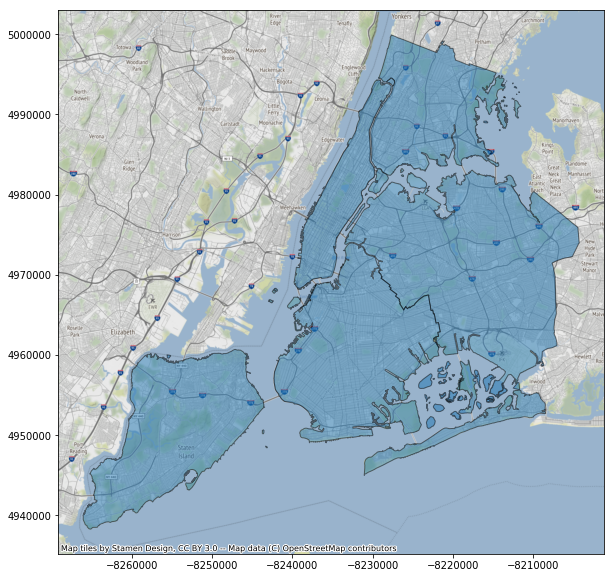

In [35]:
import geopandas
import matplotlib.pyplot as mpl
import contextily as ctx

#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#ax = world.plot(figsize = (15,15), alpha=0.5)
#world = world.to_crs(epsg=3857)
#ctx.add_basemap(ax)

df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
df = df.to_crs(epsg=3857) # coordinate reference system
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)
